In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import warnings; warnings.simplefilter('ignore')

In [2]:
file = pd.read_csv('results_survey.csv', sep =',')
print("The total number of responses received is {}.\n".format(len(file)))

The total number of responses received is 82.



In [3]:
file.columns

Index(['ID de la réponse', 'Date de soumission', 'Dernière page',
       'Langue de départ', 'Tête de série', 'Date de lancement',
       'Date de la dernière action', 'Adresse IP', 'URL référente',
       'Nom &amp; Post-nom /Firstname and Surname',
       ...
       'Durée pour la question: conn08', 'Durée pour la question: conn09',
       'Durée pour la question: conn10', 'Durée pour la question: conn11',
       'Durée pour le groupe : MESURAGE D'INTERNET',
       'Durée pour la question: meas01', 'Durée pour la question: meas02',
       'Durée pour la question: meas03', 'Durée pour la question: meas04',
       'Durée pour la question: meas05'],
      dtype='object', length=205)

In [4]:
file = file.drop(file.filter(regex='Durée').columns, axis=1)
file = file.drop(file.filter(regex='URL').columns, axis=1)
file = file.drop(file.columns[[range(0,7)]], axis=1)


In [5]:
file.rename(columns={file.columns[0]: 'IP'
                    , file.columns[1]: 'names'\
                    , file.columns[2]: 'genderM'\
                    ,file.columns[3]: 'genderF'\
                    ,file.columns[4]: 'otherGender'\
                     ,file.columns[5]: 'noAgegroup'\
                     ,file.columns[6]: 'age18_25'\
                     ,file.columns[7]: 'age26_35'\
                     ,file.columns[8]: 'age36_45'\
                     ,file.columns[9]: 'age46_55'\
                     ,file.columns[10]: 'age56+'\
                     ,file.columns[37]: 'town'\
                     , file.columns[38]: 'student'\
                     , file.columns[39]: 'self_employed'\
                     ,file.columns[40]: 'employed'\
                     ,file.columns[41]: 'unemployed'\
                     ,file.columns[42]: 'otherOccupation'\
                     ,file.columns[99]: 'speedtest_veryconcerned'\
                     ,file.columns[100]: 'speedtest_concerned'\
                     ,file.columns[101]: 'speedtest_notconcerned'\
                     ,file.columns[102]: 'speedtest_dontcare'\
                     ,file.columns[103]: 'internet_verysatisfied'\
                     ,file.columns[105]: 'internet_satisfied'\
                     ,file.columns[107]: 'internet_neutral'\
                     ,file.columns[109]: 'internet_dissatisfied'\
                     ,file.columns[111]: 'internet_verydissastisfied'\
                     ,file.columns[131]: 'promise1_3mbps'\
                     ,file.columns[132]: 'promise5_10mbps'\
                     ,file.columns[133]: 'promiseless_25mbps'\
                     ,file.columns[134]: 'promisemore_1gbps'\
                     ,file.columns[135]: 'promise_notaware'\
                     ,file.columns[136]: 'percievedspeed1_3mbps'\
                     ,file.columns[137]: 'percievedspeed5_10mbps'\
                     ,file.columns[138]: 'percievedspeed_25mbps'\
                     ,file.columns[139]: 'percievedspeed_1gbps'\
                     ,file.columns[140]: 'percievedspeed_notaware'\
                     
                     
                     
                     
                     
                    }, inplace=True)


In [6]:
#count the responses and the towns 
df = file
print("Total Number of responses: {}".format(len(df)))
print("Number of towns that responded: {}".format(len(df['town'].value_counts())))#minus 1 of 'Other'
print("Responses with no country specified: {}\n".format(len(df[df['town'] == ""])))

Total Number of responses: 82
Number of towns that responded: 12
Responses with no country specified: 0



In [7]:
# #participants who are unaware of their promissed speeds
runm = len(df[['student', 'self_employed', 'employed','unemployed','otherOccupation']][df['promise_notaware']=="Oui"])
runperc = round(runm/len(df)*100, 2)
print("Total number participants are unaware of their promised speeds: {} or {}% of all responses"\
      .format(runm, runperc))

Total number participants are unaware of their promised speeds: 28 or 34.15% of all responses


In [8]:
#percent of elements
def calc_percent(element, df):
    percentage = round(element/len(df)*100, 2)
    return percentage

In [9]:
#survey participants per occupation
students = len(df[df['student']=='Oui'])
self_employed = len(df[df['self_employed']=='Oui'])
employed = len(df[df['employed']=='Oui'])
unemployed = len(df[df['unemployed']=='Oui'])
otherOccupation = len(df[df['otherOccupation']=='Oui'])

print (""" Participants per occupation: '\n'
        - students : {} or {}% '\n'
        - selfemployed : {} or {}% '\n'
        - employed : {} or {}% '\n'
        - unemployed : {} or {}% '\n'
        - others : {} or {}% '\n' """\
      .format(students,calc_percent(students,df),self_employed,calc_percent(self_employed,df),
              employed,calc_percent(employed,df), unemployed,calc_percent(unemployed,df),
              otherOccupation,calc_percent(otherOccupation,df)
             ))
    

 Participants per occupation: '
'
        - students : 28 or 34.15% '
'
        - selfemployed : 24 or 29.27% '
'
        - employed : 29 or 35.37% '
'
        - unemployed : 9 or 10.98% '
'
        - others : 0 or 0.0% '
' 


In [10]:
def makeup():
    towns={}
    for i in df['town'].unique().tolist():
        if i != '':
            name = str(i)
            length = len(df.loc[df['town'] == name])
            towns.update({name:length })
    towns = {k: v for k, v in sorted(towns.items(), reverse=True, key=lambda x: x[1])} 
    return towns
towns = makeup()
town_names = towns.keys()
town_count= towns.values()

towns_repartition = pd.DataFrame()
towns_repartition ['town'] = town_names
towns_repartition['counts'] = town_count
towns_repartition['counts'] = towns_repartition['counts'].astype(int)
towns_repartition['town'] = towns_repartition['town'].astype(str)
towns_repartition

,town,counts
0,Goma,31
1,Kinshasa,24
2,Bukavu,9
3,Lubumbashi,8
4,Beni,3
5,Kananga,1
6,Isiro,1
7,Mbujimayi,1
8,Bunia,1
9,Moba,1


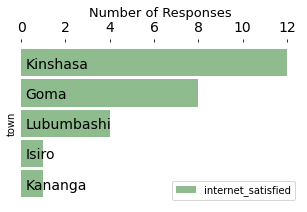

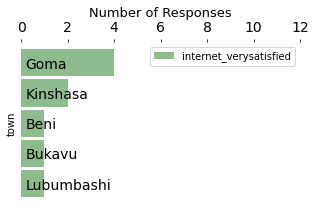

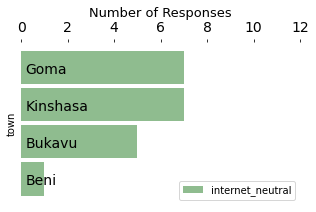

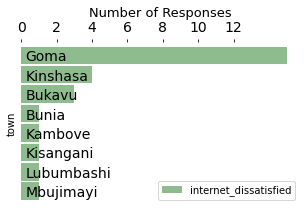

In [21]:
#Number of responses by occupation and whether they are satisfied of their internet experience

satisfied = df[['town','internet_verysatisfied','internet_satisfied','internet_neutral', 'internet_dissatisfied','internet_verydissastisfied']][df['internet_satisfied']=="Oui"]
satisfied = satisfied.groupby('town').agg({'internet_satisfied': 'count'})

internet_verysatisfied = df[['town','internet_verysatisfied','internet_satisfied','internet_neutral', 'internet_dissatisfied','internet_verydissastisfied']][df['internet_verysatisfied']=="Oui"]
internet_verysatisfied = internet_verysatisfied.groupby('town').agg({'internet_verysatisfied': 'count'})
internet_neutral = df[['town','internet_verysatisfied','internet_satisfied','internet_neutral', 'internet_dissatisfied','internet_verydissastisfied']][df['internet_neutral']=="Oui"]
internet_neutral = internet_neutral.groupby('town').agg({'internet_neutral': 'count'})
internet_dissatisfied = df[['town','internet_verysatisfied','internet_satisfied','internet_neutral', 'internet_dissatisfied','internet_verydissastisfied']][df['internet_dissatisfied']=="Oui"]
internet_dissatisfied = internet_dissatisfied.groupby('town').agg({'internet_dissatisfied': 'count'})
# satisfied.reset_index(inplace =True)
# satisfied = satisfied.rename(columns = {'index':'town'})
satisfied = satisfied.sort_values(by = ['internet_satisfied'], ascending=False)
internet_verysatisfied = internet_verysatisfied.sort_values(by = ['internet_verysatisfied'], ascending=False)
internet_neutral = internet_neutral.sort_values(by = ['internet_neutral'], ascending=False)
internet_dissatisfied = internet_dissatisfied.sort_values(by = ['internet_dissatisfied'], ascending=False)

list_satisfied = [satisfied,internet_verysatisfied,internet_neutral, internet_dissatisfied]

for df in list_satisfied:
    
    df = df.iloc[::-1] ##Reversing the index to have the higher values on top

#final = pd.concat([towns_repartition,satisfied], axis=1, join='inner')


    ax = df.plot(kind='barh', width=.9, figsize=(5,3), color='darkseagreen')

    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
    ax.yaxis.tick_right()
    ax.tick_params(axis="y", which='major', length=0)
    ax.tick_params(axis="y",direction="in", pad=-275)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top') 
    ax.set_xlabel('Number of Responses', fontdict={'fontsize': 13})
    ax.set_xticks([0,2,4,6,8,10,12])
    #plt.savefig('figures/network_responses.pdf', bbox_inches = 'tight')
    plt.show()

In [12]:
final

NameError: name 'final' is not defined